## 5.x SoundDevice and SoundFile
Python has a staggering amount of sound libraries available, both built in (`audioop, sndhdr, and wave`) and external (`pyo, pyaudio, pydub, sounddevice, soundfile, etc.`). The built in modules are functional, but not necessarily user friendly. Of the external packages, `pydub` and `sounddevice/soundfile` are a lot more user friendly.  

For this course, we will be using `sounddevice/soundfile`, because `sounddevice` gives us an easy way to interact with microphones and speakers, and `soundfile` lets us load and manipulate sound files as `numpy` arrays.

Docs for the modules are at https://python-sounddevice.readthedocs.io/ and https://pysoundfile.readthedocs.io/

### 5.x.0 Record sound
The module `sounddevice` has a `.rec()` method that records sound.
Make sure to talk while executing the next code block, so that there is sound in the recording!

In [4]:
import sounddevice as sd

# sound is recorded by sampling/measuring microphone membrane position thousands of times each second
# the sample rate is how often we record such a sample
sd.default.samplerate = 48000  # set sounddevice to record at 48k samples per second
sd.default.channels = 1  #  most laptops have 1 microphone, so lets record in mono

# sd.rec() records a specified number of samples
# so we need to multiply the number of seconds we want to record by the samplerate
samples = sd.rec(3 * sd.default.samplerate)
sd.wait()

Using the `sd.wait()` method is necessary here, because the interpreter will move on to the next line after _initiating_ the recording, without waiting for it to finish. After the code block ends, the interpreter kills any recording (or playing) of sounds that hasn't finished, so we need to artificially extend the duration of the code block a little bit to give our sound time to finish recording (`sd.wait()` takes care of this for us).

### 5.x.1 Play sounds
Sounddevice has an `sd.play()` method we can use to play samples.

In [5]:
sd.play(samples)  # since we set the default samplerate at 48kHz, sd will play 48k samples per second here
sd.wait()

The samples are just a `numpy` array of membrane positions, so if you play a sound at the wrong samplerate, the effects are predictable:

In [6]:
sd.default.samplerate = 24000  # sd will now assume sound is recorded at 24kHz
sd.play(samples)
sd.wait()

You sound weird now.
### 5.x.3 Handling sound files
Save recorded sample to file
Retrieve it

In [8]:
import soundfile as sf

sf.write('test_recording.wav', samples, sd.default.samplerate)

### 5.x.4 Visualizing sound data
Let's plot our recording so we can inspect it visually. Because it is a `numpy` array, we can just plot it like any other.

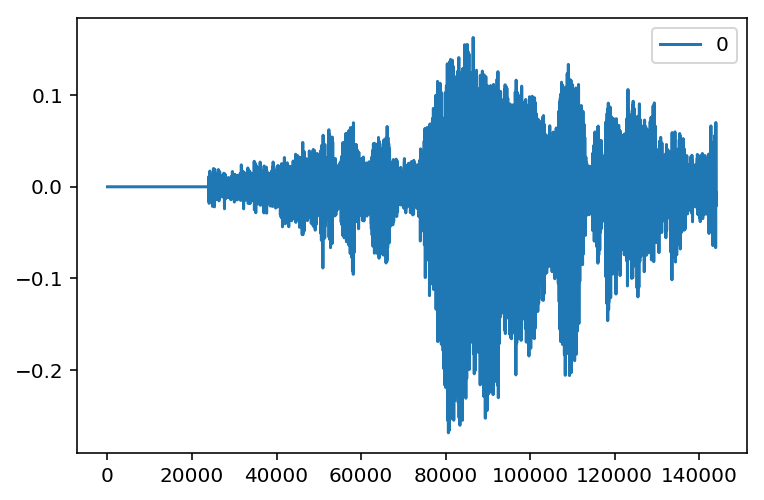

In [10]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.lineplot(data=samples)  # if you still have Seaborn 0.8.x, you may need to use tsplot() instead of lineplot()

We can also plot a spectrogram. The code for this is a bit too fiddly to get into right now, but feel free to ask about it after the session.

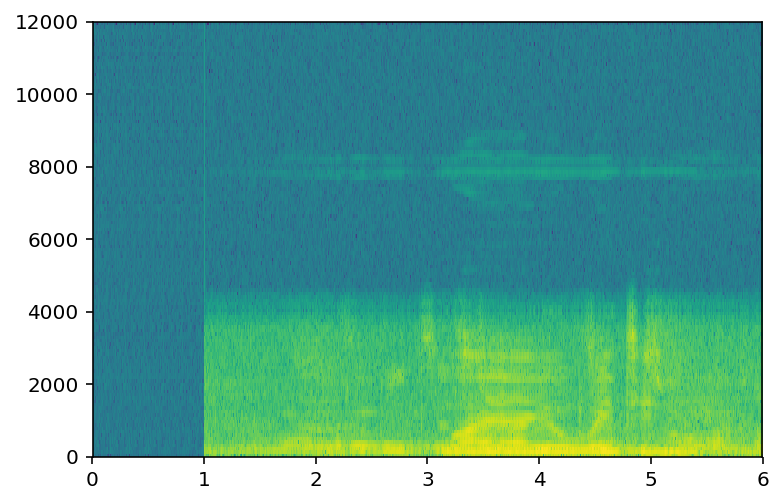

In [11]:
from scipy import signal
import matplotlib.pyplot as plt

_ = plt.specgram(samples[:, 0], Fs=sd.default.samplerate)

## 5.x Pillow
Pillow is a continuation of a project called PIL (Python Image Library) meant to make manipulation of images easier. Pillow has many features and they quite well-documented, so read the docs (https://pillow.readthedocs.io/) if you need to do something with images in Python.  

### 5.x.0 Open and resize an image
Pillow's open method is called `open()`, so opening an image is pretty straightforward.

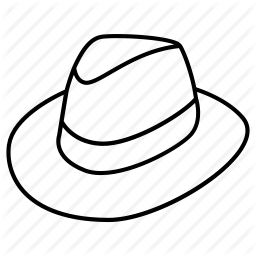

In [1]:
from PIL import Image

im = Image.open('hat.png')
im  # if we just put the variable name in a line, Jupyter displays the image below
# to display images outside of Jupyter notebooks, use the .show() method (this will open an image editor)
# im.show()

That's a little small. Let's resize the image to 400 by 400 pixels:

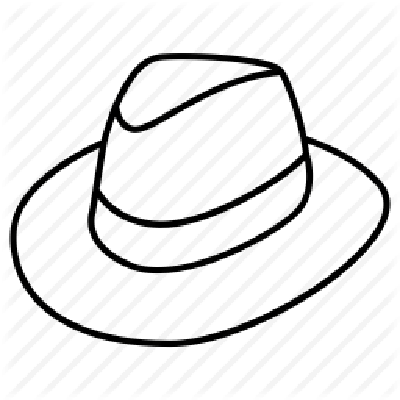

In [15]:
im.resize((400, 400))

# notice how the new size isn't two separate arguments like in 400, 400
# but rather a tuple (400, 400)
# this is how you specify image sizes in Pillow, always as a tuple, not as two single values

That looks a little too grainy to use in an experiment, let's try to clean it up a little with a scaling filter:

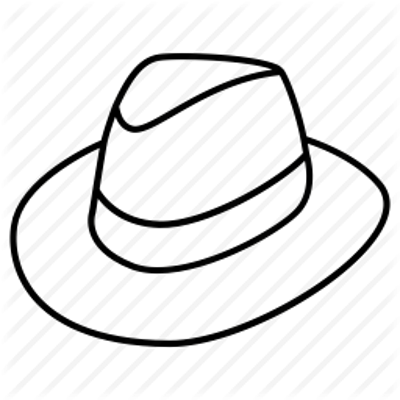

In [16]:
# as the second, optional, argument in .resize() you can specify a filter
# we're using Image.BICUBIC and that's usually a good choice, but feel free to experiment with different filters
im.resize((400, 400), Image.BICUBIC)

Much better.
Now try to rotate the image 90 degrees. It's pretty straightforward so just guess how to do it and give it a try.

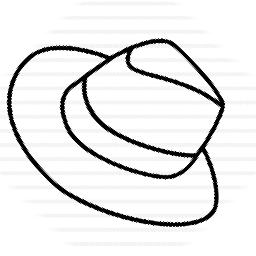

In [13]:
# rotate image here
# plot picture in 2D-figure with axes
from matplotlib import pyplot, image
from scipy import ndimage

rotated = im.rotate(45)
rotated2 = im.rotate(-45)
rotated2


### 5.x.2 Create a new image
Create blank canvas
Paste the other images into it

### Extra Credit: Go nuts
Loop over a folder of images, paste all of them into a canvas at random locations

In [3]:
from psychopy import core, visual
import os, fnmatch
import random

## list all .png in dir
lis=[]
listOfFiles = os.listdir('.')  
pattern = "*.png"
for file in listOfFiles:  
    if fnmatch.fnmatch(file, pattern):
            lis.append(file)
# print(lis)

## create a blank canvas
win = visual.Window((800, 600), color='teal')
core.wait(3)

## loop over a folder of images, paste all of the images into a canvas at random locations
for i in range(len(lis)):
    locx = random.uniform(0.0,1.0) - 0.5
    locy = random.uniform(0.0,1.0) - 0.5
    im = visual.ImageStim(win=win, image = lis[i],pos=(locx,locy))
    im.draw()
    win.flip()
    core.wait(1)
    
core.wait(3)
win.close()



111.5056 	WARNING 	Monitor specification not found. Creating a temporary one...


## 5.x PsychoPy
PsychoPy is a Python package for running experiments. It has routines for presenting stimuli, recording responses, and a bunch of other small things you might need for setting up an experiment.  
PsychoPy documentation is not bad, but not quite on the level of some other Python packages (http://www.psychopy.org/documentation.html).  

You can think of PsychoPy as a replacement for Presentation or E-Prime, with two very important benefits over Presentation:
1. The Python environment that PsychoPy lives in offers many other modules, meaning you can extend and enhance your experiment any way you like.
2. Python and PsychoPy are open source and freely available, meaning that I can share a Github repo of my experiment code, and someone in Nigeria or Chile can download my code and run the experiment locally themselves, without having to buy expensive licenses. If we want science to be open and reproducible, that should apply to our experiment code as well.

(As an aside, this availability comment applies to Matlab as well. Fieldtrip, SPM, and other toolkits might be freely available, but Matlab itself is not.)

### 5.x.0 Running PsychoPy from Jupyter Notebooks
PsychoPy wasn't written with the idea of running it from a Jupyter notebook in mind. Instead, PsychoPy scripts are usually run from the command line. This means that running PsychoPy code from this notebook can results in weird malfunctions, such as experiment windows not opening and closing correctly.  
Luckily there is a fix in the form of another built-in Python module, one that is useful in many other situations as well:
### 5.x.1 Subprocess
The subprocess module allows you to start new processes from a Python process. These processes start and finish separately of the notebook, allowing PsychoPy to run as it would run from the command line.

In [3]:
import subprocess as sp

# sp.run() takes a list of things you would normally separate with spaces on the command line
# so "python3 experimenty.py" becomes ['python3', 'experiment.py']
sp.run(['python', 'openwindow.py'])

CompletedProcess(args=['python', 'openwindow.py'], returncode=0)

The `sp.run()` method returns a `CompletedProcess` object with a `returncode`. In this case the code is 0, which means nothing to report (so execution was successful). If you break the function call by specifying a non-existent Python script, what happens?  

Now go into the Session4 folder and look in the `openwindow.py` file. This is where the PsychoPy code is. Try to understand what's going on in the file before you move on to the next section.
### 5.x.2 Drawing and displaying stimuli
When presenting stimuli, we want fine-grained control of the timing. To control the stimulus presentation precisely we need to take the screen refresh rate into account. Your screen only updates about 60 times per second, which is faster than you can see but not all that fast: Your screen refreshes only once every 17 milliseconds.  
This has important consequences. Most importantly, you can't present a stimulus for less than 17 milliseconds, or present another stimulus within 17 milliseconds of presenting the first. All interstimulus intervals are in multiples of the refresh rate as well, so 60 ms is not possible, you will have to choose between 50 ms and 67 ms instead.  

To control what is presented on screen after a refresh, we _draw_ stimuli to a _back buffer_. Then we call the `.flip()` method of our display window to _flip_ the contents of the _back buffer_ to the _front buffer_ which is drawn to the screen at the next refresh.  
If this all sounds overly complicated, that's because it's much more confusing in theory than in practice.  

In our next code block, we'll run a script that opens a window and draws some text to the screen as we might do in an experiment.

In [19]:
sp.run(['python', 'displaytext.py'])

NameError: name 'sp' is not defined

Look inside `displaytext.py` to see how the code is structured.  

Now let's display something even more dynamic, a clock!
We'll start by using PsychoPy's internal clock function, and drawing it to the back buffer on each screen refresh for a duration of 30 seconds.

In [33]:
sp.run(['python', 'displayclock.py'])

CompletedProcess(args=['python', 'displayclock.py'], returncode=0)

As before, look inside `displayclock.py` to see what we are doing. The `while` loop and f-strings from earlier sessions are making a comeback. If you want to know more about them, check the Python docs!
## 5.x DIY time: Magical spinning hat!
### 5.x.0 Creating the stimuli
Use a `for` loop, the `range` function, and the `.rotate()` method from Pillow to rotate our hat picture from before through 360 degrees, saving a new picture for each degree of rotation.  
__Hint:__ Build your code up in steps. First open the picture using Pillow. Then use the loop and `range` function to loop 360 times and just print numbers. Then rotate the picture on each iteration, then save each rotated picture (make sure to put the rotation in the filename!).

In [1]:
from PIL import Image

im = Image.open('hat.png')
for i in range(6):
#     print(i)
    name = "rotated" + str(i*60) + "degree.png"
    print(str(i*60)) # rotated degree
    imtemp = im.rotate(i*60) # 360 pictures is too much, only 6 here
    imtemp.save(name)

### 5.x.1 Present the stimuli
Use PsychoPy to draw the pictures. You can just use a while loop to create an infinite loop. Draw the images to the buffer and then flip it, you will have a new one each 17 ms, rotating our hat 60 degrees per second.  
Put the code in a file called `hatspin.py`.

In [4]:
sp.run(['python', 'hatspin.py'])

CompletedProcess(args=['python', 'hatspin.py'], returncode=1)

### 5.x.2 Speed it up!
Speed up the rotation by skipping every other picture.

In [ ]:
sp.run(['python3', 'hatspin.py'])

### 5.x.3 Press spacebar to stop
Use the key capture method in PsychoPy to break out of your while loop and stop spinning the hat.  
__Hint:__ Import `event` from PsychoPy, that's where the key capture functions are. There are two for the keyboard: event.waitKeys() and event.getKeys(). What do you think the difference is? Which one would you use if you want the script to continue running while you check for keypresses?

In [ ]:
sp.run(['python3', 'hatspin.py'])
# event.waitKeys() means wait for key to go to next state
# event.getKeys() means get the key to skip current state

### 5.x.4 Handing over control to the participant
Using the key capture, implement full controls over the hat rotation: Speed up and down, clockwise and counterclockwise, pause and continue.

In [ ]:
sp.run(['python3', 'hatspin.py'])